# Exploratory Data Analysis - Business Dataset

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import learning_curve, cross_validate, cross_val_score

## Business dataset

In [3]:
# Load data
business_path = '/Users/quentindubois/code/Dimasaur/scorecast/raw_data/yelp_dataset_yelp_academic_dataset_business.json'
business = pd.read_json(business_path,
                    lines=True)

In [4]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Describe data

In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


### __Observations__
- The `attributes` feature has 9,2% missing values
- The hours feature has 15,4% missing values
- Everything else is __fine__.

In [6]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [7]:
business.stars.value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

### __Observations__
Few numerical columns:
- Latitude and longitude aren't that useful
- The `stars` feature is numerical but it is actually a discrete variable, with values ranging from 1.0 to 5.0, with a step size of 0.5 (i.e. 1.0, 1.5, 2.0, 2.5, and so on). __It will need to be encoded with an ordinal encoder.__
- `review_count` looks like it might have a right skew: average number of reviews is 45 with a standard deviation of 121, 75th percentle is 37.
- `is_open` is a boolean field coming through as an integer.

# Data Visualisation
### Numerical features: `stars`, `review_count`, `is_open`
#### `stars`

Text(0.5, 1.0, 'Stars\nMean:3.6\nStd. Dev:0.97')

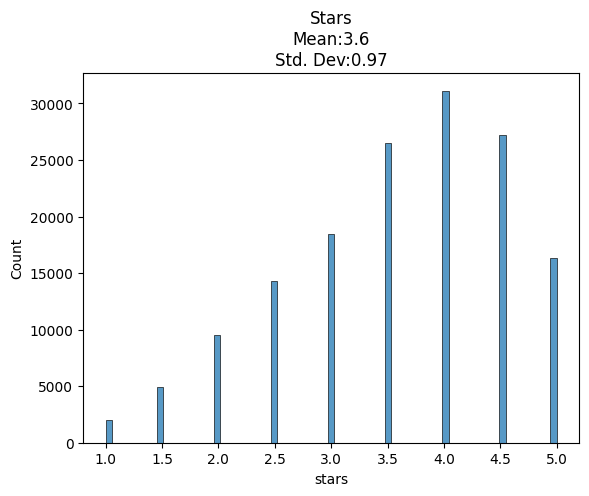

In [8]:
sns.histplot(data = business.stars);
plt.title(f'Stars\nMean:{round(business.stars.mean(),2)}\nStd. Dev:{round(business.stars.std(),2)}')

#### `review_count`

Text(0.5, 1.0, 'Review Count (Zoomed)')

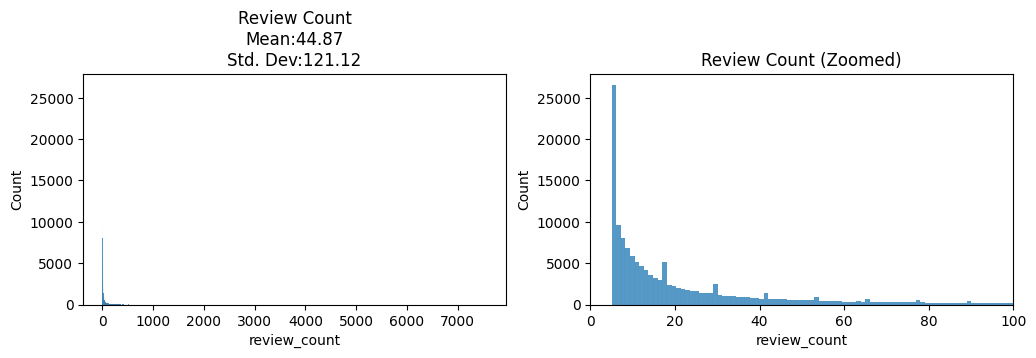

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))

sns.histplot(data = business.review_count, ax = ax[0])
sns.histplot(data = business.review_count, ax = ax[1])
ax[1].set_xlim([0,100])
ax[0].set_title(f'Review Count\nMean:{round(business.review_count.mean(),2)}\nStd. Dev:{round(business.review_count.std(),2)}')
ax[1].set_title(f'Review Count (Zoomed)')

In [10]:
business.review_count.min()

5

#### `is_open`

Text(0.5, 1.0, 'Is open\nMean:0.8\nStd. Dev:0.4')

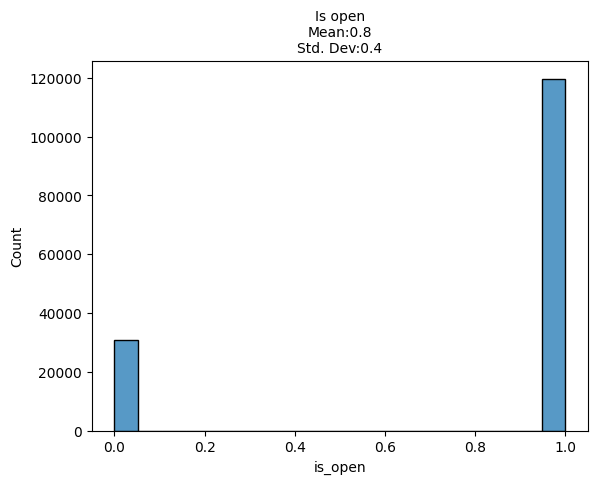

In [11]:
sns.histplot(data = business.is_open);
plt.title(f'Is open\nMean:{round(business.is_open.mean(),2)}\nStd. Dev:{round(business.is_open.std(),2)}',
          fontsize=10)

In [12]:
business.is_open.value_counts(normalize=True)

1    0.79615
0    0.20385
Name: is_open, dtype: float64

### Categorical features: `city`, `state`, `postcode`, `attributes`, `categories`, `hours`
#### `city`

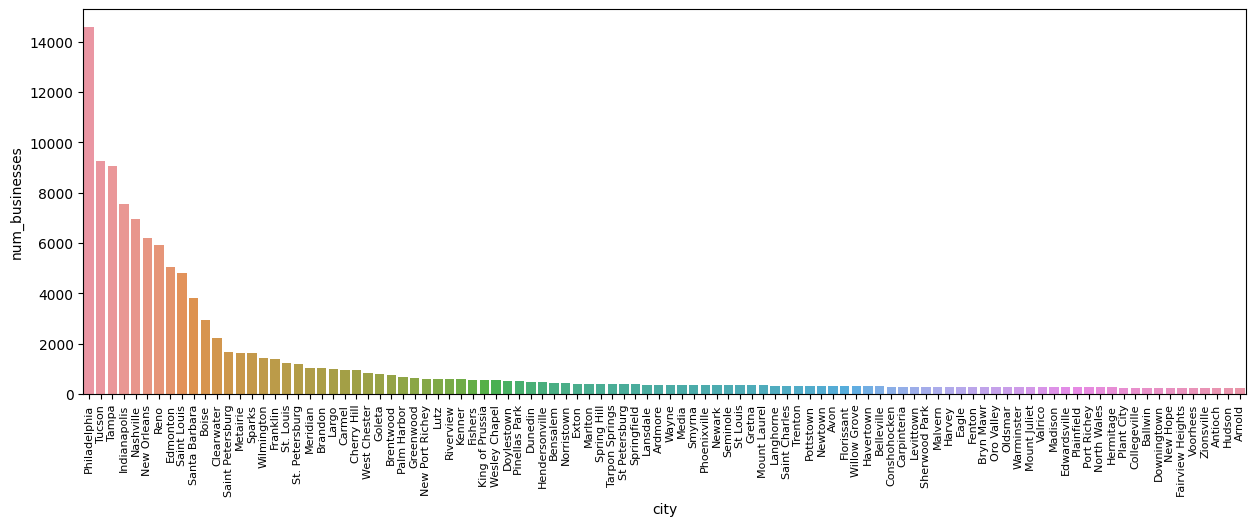

In [21]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
city_counts = business['city'].value_counts().reset_index()[:100]
city_counts.columns = ['city', 'num_businesses']

sns.barplot(data = city_counts,
            x='city',
            y='num_businesses')
# Rotate x-tick labels due to many cities
plt.xticks(rotation=90, fontsize=8);

In [22]:
business.city.value_counts(normalize=True)

Philadelphia      0.096903
Tucson            0.061525
Tampa             0.060194
Indianapolis      0.050151
Nashville         0.046366
                    ...   
Gentilly          0.000007
pennsauken        0.000007
Hamiltion         0.000007
Newtown square    0.000007
Apollo beach      0.000007
Name: city, Length: 1416, dtype: float64

In [23]:
business.city.nunique()

1416

### __Observations__
- There are __1416__ unique cities represented in the business dataset.
- Philadelphia accounts for 9,6% of all businesses.

#### `state`

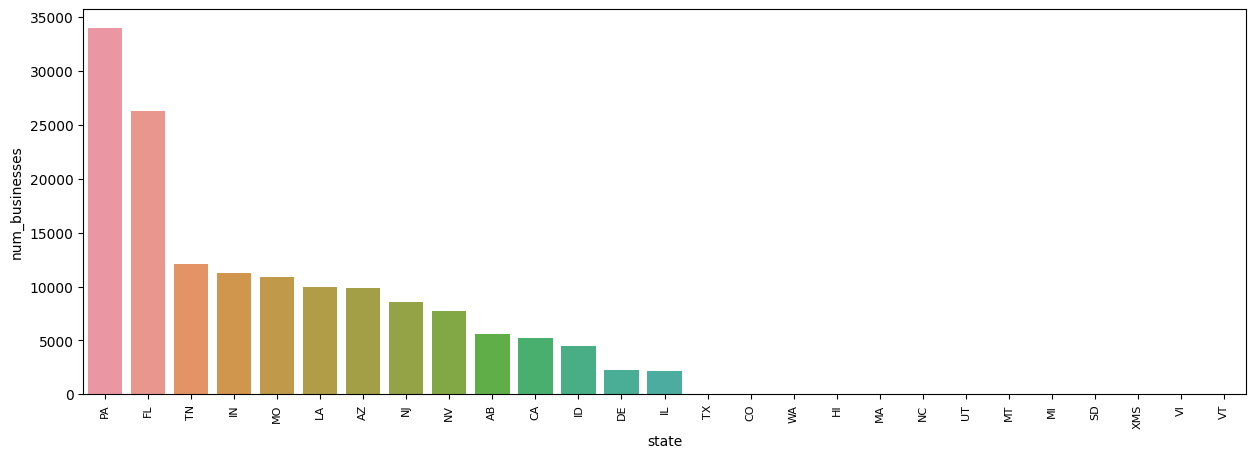

In [24]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
state_counts = business['state'].value_counts().reset_index()
state_counts.columns = ['state', 'num_businesses']

sns.barplot(data = state_counts,
            x='state',
            y='num_businesses')
# Rotate x-tick labels due to many states
plt.xticks(rotation=90, fontsize=8);

In [27]:
business.state.nunique()

27

In [31]:
business.state.value_counts(normalize=True)[0:5]

PA    0.226404
FL    0.175129
TN    0.080188
IN    0.074807
MO    0.072586
Name: state, dtype: float64

### __Observations__
- 27 unique states represented
- Quite some concentration:
  - Pennsylvania accounts for 23% of businesses
  - The top 5 states account for 63% of businesses
    - Pennsylvania (23%)
    - Florida (18%)
    - Tennessee (8%)
    - Indiana (7%)
    - Montana (7%)

---

## `review` data

In [13]:
review_path = '/Users/quentindubois/code/Dimasaur/scorecast/raw_data/yelp_academic_dataset_review.json'

def process_and_load_json_in_batches(file_path, chunk_size=100000):
    chunks = []
    with pd.read_json(file_path, lines=True, chunksize=chunk_size) as reader:
        for chunk in reader:
            # Perform any data processing on the chunk here
            # For example, filtering data
            chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

# Load and process data
review = process_and_load_json_in_batches(review_path)

In [14]:
print(f'Shape\n{review.shape[0]} rows\n{review.shape[1]} columns')
review.head()

Shape
6990280 rows
9 columns


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
